In [1]:
# notebooks/01_first_eda.py
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
DATA_PATH = "C:/Users/Anupam/Desktop/traffic-prediction-project/data_raw/US_Accidents_March23.csv"

if not os.path.exists(DATA_PATH):
    print("ERROR: dataset file not found at", DATA_PATH)
    print("Put the downloaded CSV in data_raw/ and update DATA_PATH variable.")
    raise SystemExit

In [3]:
# Read a sample (use low memory to avoid huge memory spike)
print("Loading first 200k rows to inspect (you can change number)...")
df = pd.read_csv(DATA_PATH, nrows=200000, parse_dates=['Start_Time', 'End_Time'])
print("Loaded shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Loading first 200k rows to inspect (you can change number)...
Loaded shape: (200000, 46)

Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [4]:
# Show sample rows
print("\n--- Sample rows ---")
print(df.head(5).to_string())


--- Sample rows ---
    ID   Source  Severity          Start_Time            End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)                                                                            Description                     Street          City      County State     Zipcode Country    Timezone Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight
0  A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147 -84.058723      NaN      NaN          0.01  Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.                     I-70 E        Dayton  Montgomery    OH       45424      US  US/Easte

In [5]:
# Basic stats
print("\nValue counts for Severity:")
print(df['Severity'].value_counts())


Value counts for Severity:
Severity
2    117810
3     81906
1       154
4       130
Name: count, dtype: int64


In [6]:
# Convert Start_Time to datetime index (for plotting)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df.set_index('Start_Time', inplace=True)

In [7]:
# Resample accidents per month
acc_per_month = df.resample('M').size()
print("\nAccidents per month (sample):")
print(acc_per_month.tail(12))

C:\Users\Anupam\AppData\Local\Temp\ipykernel_30252\3634245251.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  acc_per_month = df.resample('M').size()



Accidents per month (sample):
Start_Time
2016-02-29      425
2016-03-31     3708
2016-04-30    11553
2016-05-31     9803
2016-06-30    15093
2016-07-31    18378
2016-08-31    23693
2016-09-30    23085
2016-10-31    21973
2016-11-30    25760
2016-12-31    27106
2017-01-31    19423
Freq: ME, dtype: int64


Saved plot to results/accidents_per_month.png


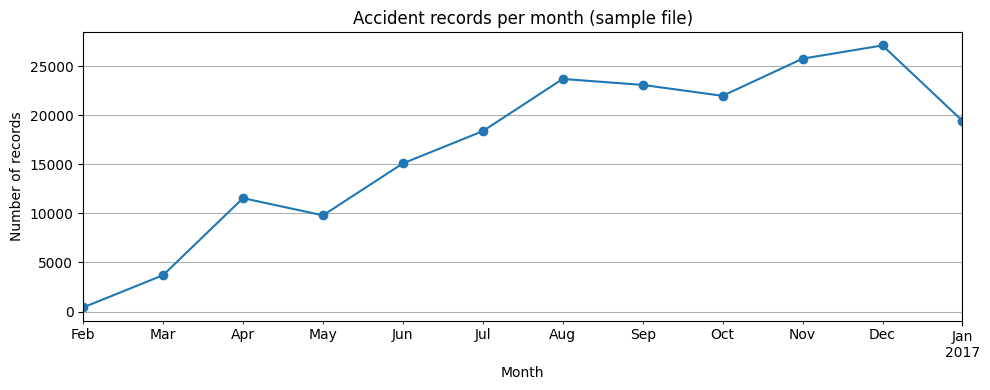

In [9]:
# Plot last 24 months (if available)
plt.figure(figsize=(10,4))
acc_per_month.plot(marker='o')
plt.title("Accident records per month (sample file)")
plt.xlabel("Month")
plt.ylabel("Number of records")
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/Anupam/Desktop/traffic-prediction-project/results/accidents_per_month.png")
print("Saved plot to results/accidents_per_month.png")